In [206]:
import os
import json

def load_json_file(file_name):
    with open(file_name, "r") as file:
        data = json.load(file)
    return data

dir_with_models = "../new_corinna_included/trained_models"

history_and_settings_list = []
for model_dir in os.listdir(dir_with_models):
    if model_dir[:4] == "both":
        try:
            history_json_file = os.path.join(dir_with_models, model_dir, "history.json")
            settings_json_file =  os.path.join(dir_with_models, model_dir, "settings.json")
            history = load_json_file(history_json_file)
            settings = load_json_file(settings_json_file)
            history_and_settings_list.append((history, settings))
        except FileNotFoundError:
            print(f"model not finished training: {model_dir}")

model not finished training: both_mode_precursor_mz_ionmode_4000_layers_1000_embedding_2024_11_21_20_07_11
model not finished training: both_mode_precursor_mz_ionmode_4000_layers_500_embedding_2024_11_21_09_20_43


In [207]:
def print_relevant_settings(settings):
    print(settings["average_inchikey_sampling_count"])
    print(settings["fingerprint_nbits"])
    print(settings["base_dims"])
    metadata_types = []
    for metadata in settings["additional_metadata"]:
        metadata_types.append(list(metadata[1].values())[0])
    print(set(metadata_types))


In [208]:
def check_if_correct_constant_settings(settings, settings_to_check):
    for setting_to_check, expected_setting in settings_to_check.items():
        if setting_to_check == "additional_metadata":
            metadata_types = []
            for metadata in settings["additional_metadata"]:
                metadata_types.append(list(metadata[1].values())[0])
            if set(metadata_types) != expected_setting:
                return False
        else:
            if settings[setting_to_check] != expected_setting:
                return False
    return True

In [321]:
from matplotlib import pyplot as plt
def plot_history(list_of_histories_and_settings, setting_to_vary, settings_to_keep_constant, title="", loss_type="val_rmse", labels_to_exclude=[], save_fig=None, legend_title="", label_is_int=False):
    stuff_to_plot = {}
    plt.figure(figsize=(8, 4))
    for i, history_and_settings in enumerate(list_of_histories_and_settings):
        history, settings, = history_and_settings
        if check_if_correct_constant_settings(settings, settings_to_keep_constant):
            if setting_to_vary == "additional_metadata":
                metadata_types = []
                for metadata in settings["additional_metadata"]:
                    metadata_types.append(list(metadata[1].values())[0])
                label = ", ".join(set(metadata_types))
            else:
                if isinstance(settings[setting_to_vary], list):
                    label = ", ".join(map(str, settings[setting_to_vary]))
                else:
                    label = str(settings[setting_to_vary])
            if len(label) < 6:
                if label_is_int:
                    label = int(label)
    
                if label in stuff_to_plot:
                    label = str(label)  + " " + str(i)
                if label not in labels_to_exclude:
                    stuff_to_plot[label] = history[loss_type]
            
    for label in sorted(stuff_to_plot):
        # if len(label)< 2:
        #     plt.plot(stuff_to_plot[label], label="no metadata")
        # else:
            plt.plot(stuff_to_plot[label], label=label)
    
    plt.title(title)
    
    loss_labels = {"val_rmse": "Validation RMSE", "rmse": "Train RMSE", "val_losses": "Validation MSE", "losses": "Training MSE"}
    plt.ylabel(loss_labels[loss_type])
    plt.xlabel("Epoch")
    plt.legend(loc="upper right", title=legend_title)
    # plt.ylim(0.18, 0.23)
    if save_fig is None:
        plt.show()
    else:
        plt.savefig(save_fig, format="svg")
        plt.show()

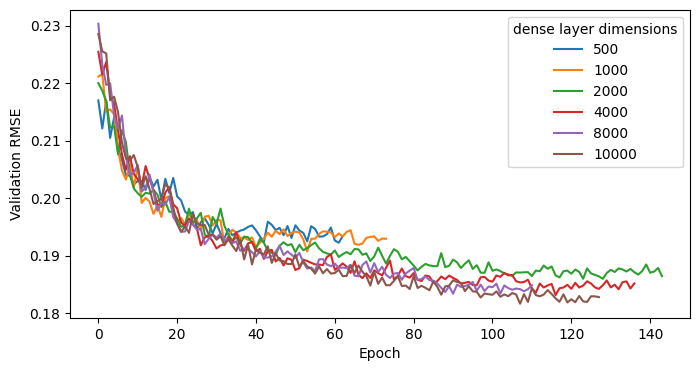

In [333]:
constant_settings = {
    "average_inchikey_sampling_count": 100,
    "mz_bin_width": 0.1,
    "fingerprint_nbits": 4096,
    "additional_metadata": {"ionmode", "precursor_mz"},
    "embedding_dim": 500,
    "loss_function": "mse"}
plot_history(history_and_settings_list, "base_dims", constant_settings, legend_title="dense layer dimensions", labels_to_exclude=["2000 33"],label_is_int=True,
             save_fig="./hyperparameter_optimization/single_layer_dimensions.svg"
            )

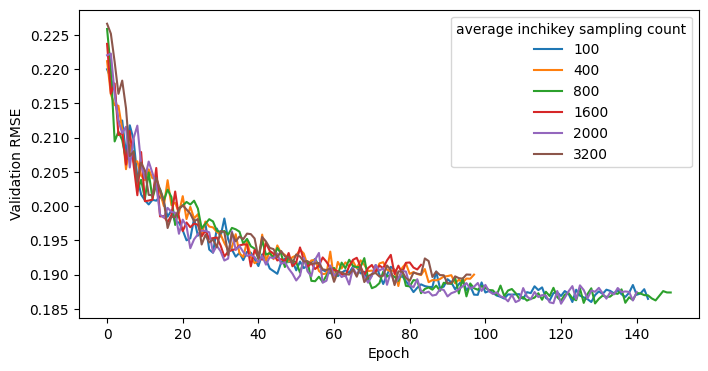

In [319]:
constant_settings = {
    "fingerprint_nbits": 4096,
    "base_dims": [2000],
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse",
    "mz_bin_width": 0.1,
    "learning_rate": 0.00025
                             }
plot_history(history_and_settings_list, "average_inchikey_sampling_count", constant_settings, legend_title="average inchikey sampling count", labels_to_exclude=["100 33", 1000, 1200, 2400, 2800], label_is_int=True,
             save_fig="./hyperparameter_optimization/average_inchikey_sampling_count.svg"
            )

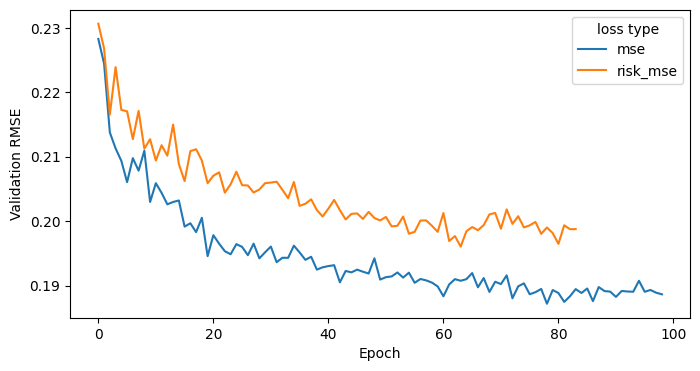

In [311]:
constant_settings = {
    "average_inchikey_sampling_count": 1000,
    "fingerprint_nbits": 4096,
    "base_dims": [2000],
    "additional_metadata": {"ionmode", "precursor_mz"},
    # "loss_function": "mse"
                             }
plot_history(history_and_settings_list, "loss_function", constant_settings,loss_type="val_rmse", legend_title="loss type", save_fig="./hyperparameter_optimization/risk_mse.svg")

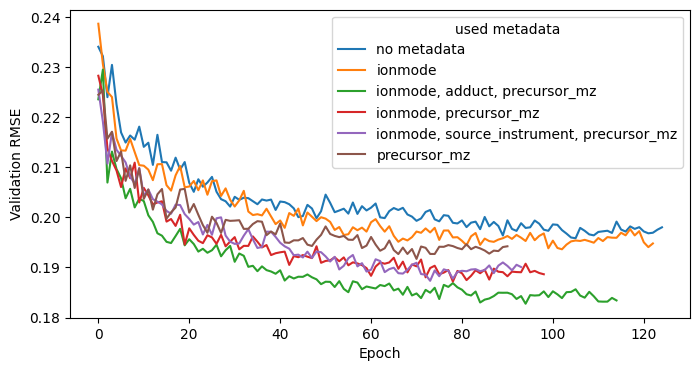

In [283]:
constant_settings = {
    "average_inchikey_sampling_count": 1000,
    "fingerprint_nbits": 4096,
    "base_dims": [2000],
    # "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "additional_metadata", constant_settings, legend_title="used metadata",
             save_fig="./hyperparameter_optimization/additional_metadata.svg"
            )


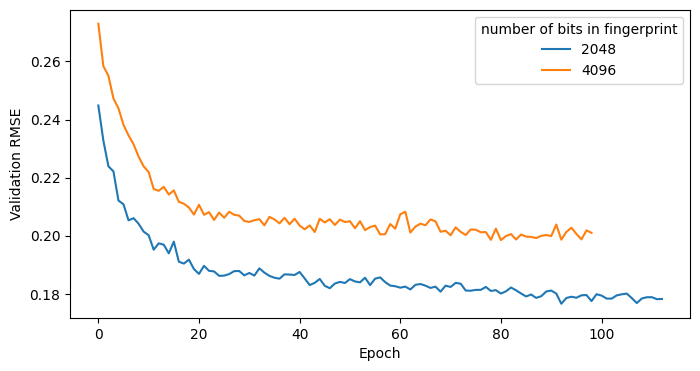

In [318]:
constant_settings = {
    "average_inchikey_sampling_count": 1000,
    # "fingerprint_nbits": 4096,
    "base_dims": [2000, 2000, 2000],
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "fingerprint_nbits", constant_settings, legend_title="number of bits in fingerprint", save_fig="./hyperparameter_optimization/fingerprint_nbits.svg")

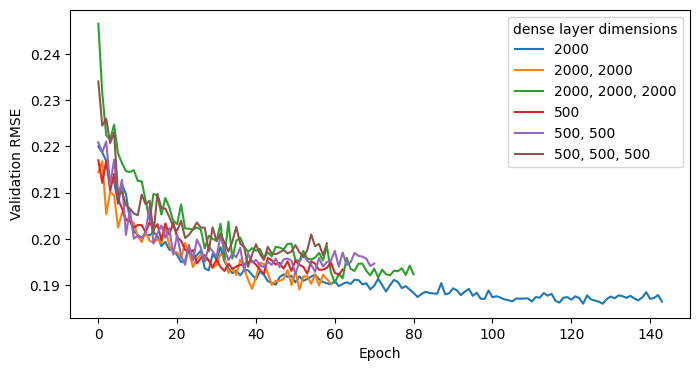

In [316]:
constant_settings = {
    "average_inchikey_sampling_count": 100,
    "fingerprint_nbits": 4096, 
    "embedding_dim": 500, 
    "mz_bin_width": 0.1,
    # "learning_rate": 0.0001,
    # "base_dims": [2000, 2000, 2000],
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "base_dims", constant_settings, legend_title="dense layer dimensions", labels_to_exclude=["2000, 2000 17", "2000, 2000 18", "2000, 2000 25", "2000 33", "4000", "8000", "1000", "1000, 1000", "10000"],
            save_fig="./hyperparameter_optimization/multilayers.svg"
            )

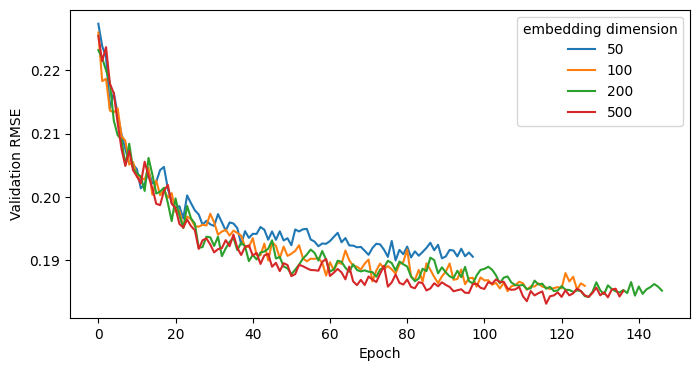

In [259]:
constant_settings = {
    "average_inchikey_sampling_count": 100,
    "fingerprint_nbits": 4096,
    "mz_bin_width": 0.1,
    "base_dims": [4000],
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "embedding_dim", constant_settings, legend_title="embedding dimension", label_is_int=True, 
             save_fig="./hyperparameter_optimization/embedding_dimsensions.svg")

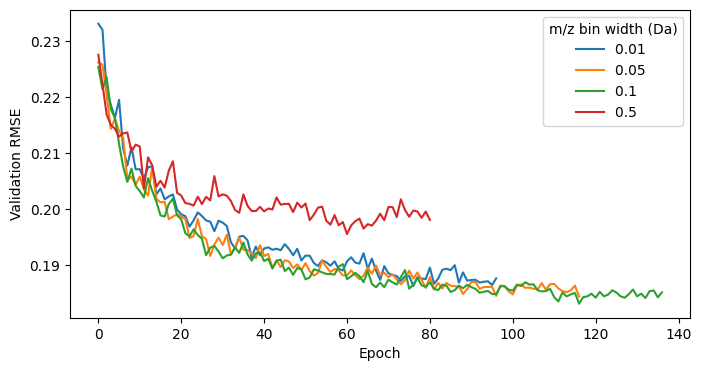

In [253]:
constant_settings = {
    "average_inchikey_sampling_count": 100,
    "fingerprint_nbits": 4096,
    "base_dims": [4000],
    "embedding_dim": 500, 
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "mz_bin_width", constant_settings, legend_title="m/z bin width (Da)",
             save_fig="./hyperparameter_optimization/mz_bin_width.svg")

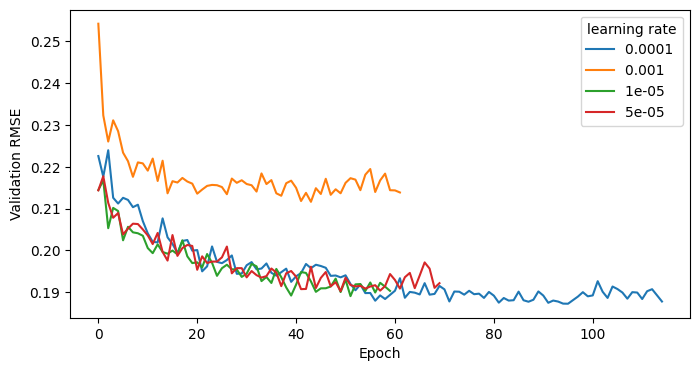

In [251]:
constant_settings = {
    "average_inchikey_sampling_count": 100,
    "fingerprint_nbits": 4096,
    "base_dims": [2000, 2000],
    "embedding_dim": 500, 
    "additional_metadata": {"ionmode", "precursor_mz"},
    "loss_function": "mse"}
plot_history(history_and_settings_list, "learning_rate", constant_settings, legend_title="learning rate", 
             save_fig="./hyperparameter_optimization/learning_rate.svg"
            )